In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv('data/test.csv', sep=',')

## ENCODAGE

In [3]:
from sklearn import preprocessing

In [4]:
def encodage_feature(df, column):
    lb = preprocessing.LabelBinarizer()
    label = lb.fit_transform(df[[column]])
    labels = pd.DataFrame(label)
    
    return labels

In [5]:
def data_preprocessing(df):
    try:
        X = df.drop('label', axis=1)
        y = df['label']
        y = y.values.reshape(y.shape[0], 1)
#         y = encodage_feature(df, 'label')
        print(X.shape, y.shape)
    except:
        X = df
        y = None
        print(X.shape)

    
    
    return X, y

In [6]:
X, y = data_preprocessing(train.head(3500))

(3500, 784) (3500, 1)


## TRAINSET

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2450, 784)
(1050, 784)
(2450, 1)
(1050, 1)


## MODELISATION

### 1.1 Phase d'entrainement avec Scikit-learn

In [11]:
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [199]:
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [202]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
# for ax, image, prediction in zip(axes, X_test, predicted):
#     ax.set_axis_off()
#     image = image.reshape(28, 28)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title(f"Prediction: {prediction}")

In [200]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]


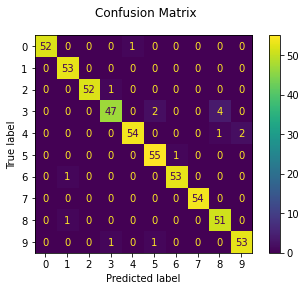

In [201]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

### 1.2 Optimisation des hyperparamètres

In [19]:
# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"]}
] 
    

# tuned_parameters = [
#     {"kernel": ["rbf", "linear"], "gamma": [1, 0.01], "C": [100, 1000]}
# ]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    cv_set = KFold(n_splits=5, shuffle=True, random_state=0)
    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score, cv=cv_set)
    clf.fit(X_train, y_train.ravel())
        
    print("Best estimators set found on development set:")
    print()
    print(clf.best_estimator_)
    print()

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\l

C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\namor\anaconda3\envs\intro-conda\l

Best estimators set found on development set:

SVC(C=1, kernel='linear')

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.010 (+/-0.002) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.010 (+/-0.002) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.893 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.893 (+/-0.023) for {'C': 10, 'kernel': 'linear'}
0.893 (+/-0.023) for {'C': 100, 'kernel': 'linear'}
0.893 (+/-0.023) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The sc

Confusion matrix:
[[ 98   0   1   0   1   2   2   0   1   0]
 [  0 117   0   0   1   0   1   0   1   0]
 [  1   1 105   1   2   1   2   0   0   1]
 [  0   1   3  90   0   1   0   1   4   0]
 [  1   0   1   0  91   0   2   0   0   4]
 [  0   4   3   4   0  85   0   1   2   1]
 [  1   0   1   0   1   1 102   0   1   0]
 [  1   1   0   0   2   0   0 100   1   3]
 [  0   3   5   3   0   3   0   1  88   1]
 [  0   1   1   0   5   1   0   3   1  81]]


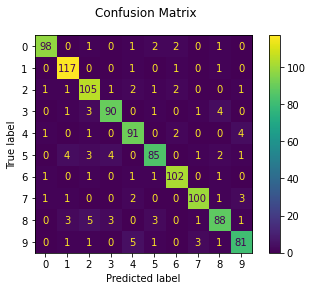

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

### 1.3 Évaluer le modèle avec la courbe de ROC

In [22]:
from sklearn.metrics import roc_curve

In [23]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [30]:
# prob = clf.predict_proba(X_test)
# prob = probs[:, 1]
# fper, tper, thresholds = roc_curve(y_true, y_pred)
# plot_roc_curve(fper, tper)

## SCIKIT-LEARN

In [19]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

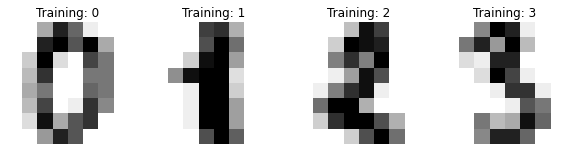

In [20]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [78]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

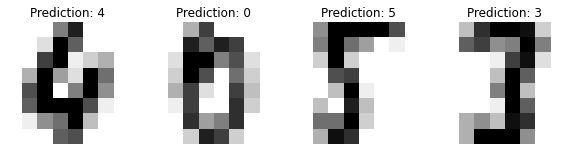

In [79]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [76]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


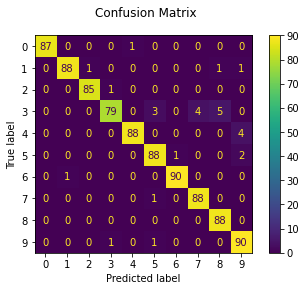

In [77]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")